In [112]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
pd.options.display.max_rows = 100

In [114]:
fires_2017 = pd.read_csv("forest_fires_1.csv")

In [115]:
fires_2017.drop(fires_2017.index[[43, 49, 50, 51]], inplace=True)

In [116]:
fires_2017

,Country,Current year,Average in the period,Country size
0,Andorra [AD],0,0,45221
1,Albania [AL],25041,14979,2876203
2,Austria [AT],699,1885,8380920
3,Åland Islands [AX],0,0,149696
4,Bosnia and Herzegovina [BA],45724,19891,5107961
5,Belgium [BE],0,141,3066748
6,Bulgaria [BG],72006,103608,11164672
7,Belarus [BY],6230,40981,20645011
8,Switzerland [CH],49,121,4122785
9,Czechia [CZ],4379,1390,7868762


In [117]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

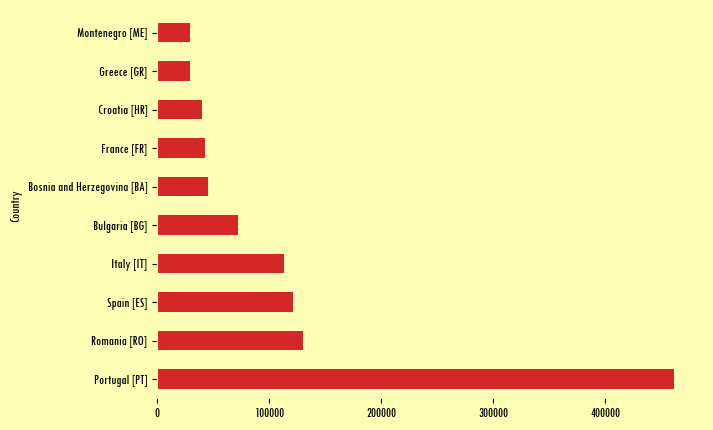

In [130]:
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][3]
ax = fires_2017.sort_values(by="Current year", ascending=False).head(10).plot(x='Country', y='Current year', kind='barh', figsize=(7,5), color=color, legend=False)

plt.rcdefaults()
plt.rcParams.update({
  'figure.facecolor': '#feffb5',
  'figure.edgecolor': 'none',
  'figure.frameon': False,
  'legend.fancybox': True, 
  
  'font.family': 'sans-serif',
  'font.sans-serif': ['Tw Cen MT Condensed'],
  'font.stretch': 'normal',
  'font.weight': 400,
    
  'axes.facecolor': 'feffb5',
  'axes.edgecolor': 'feffb5',
  'grid.color': '#FFFFFF',
  'grid.alpha': 0.8,
  'grid.linewidth': 0.5,

  'legend.frameon': False,
  'legend.loc': 'lower left',
  'legend.borderpad': 0.,
  'legend.labelspacing': 2.,
  'legend.columnspacing': 2,
  'legend.handletextpad': 0.8,

  'savefig.facecolor': 'd5e2e9',
  'savefig.transparent': False,
  'savefig.frameon': True
})
plt.show()

In [33]:
fires_by_year = pd.read_csv("forest_fires_2.csv")

In [39]:
fires_by_year.head()

,Number of fires,Portugal,Spain,France,Italy,Greece,Algeria,Austria,Bulgaria,Croatia,...,Lithuania,Morocco,Norway,Poland,Romania,Slovakia,Slovenia,Sweden,Switzerland,Turkey
0,1980,2349,7190,5040,11963,1207,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86,NaN
1,1981,6730,10878,5173,14503,1159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152,NaN
2,1982,3626,6545,5308,9557,1045,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85,NaN
3,1983,4539,4791,4659,7956,968,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118,NaN
4,1984,7356,7203,5672,8482,1284,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183,NaN


In [38]:
greece_fires = fires_by_year['Greece']

In [40]:
years = fires_by_year['Number of fires']

In [48]:
greece_fires  = pd.concat([years, greece_fires], axis = 1, sort=True, ignore_index=True)

In [50]:
greece_fires.head()

,0,1
0,1980,1207
1,1981,1159
2,1982,1045
3,1983,968
4,1984,1284


In [69]:
greece_fires.rename(columns={0: 'Year', 
                             1: 'Fires',
                            }, 
                 inplace=True)

In [70]:
greece_fires

,Year,Fires
0,1980,1207
1,1981,1159
2,1982,1045
3,1983,968
4,1984,1284
5,1985,1442
6,1986,1082
7,1987,1266
8,1988,1898
9,1989,1284


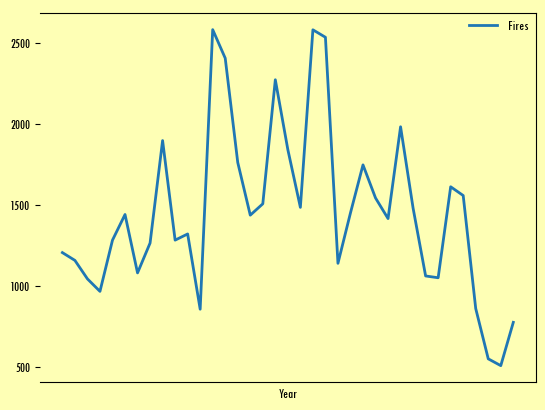

In [137]:
ax = greece_fires.plot(x='Year', y='Fires', linewidth=2.0)

plt.rcParams.update({
  'axes.spines.bottom': True,
  'axes.spines.left': False,
  'axes.edgecolor': '000000',


  'xtick.bottom': False,
  'xtick.labeltop': False,
  'xtick.labelbottom': False,
  'xtick.direction': 'in',
  'xtick.major.size': 4,
  'xtick.minor.size': 3.5,
  'xtick.major.width': 0.5,
  'xtick.minor.width': 0.5,
  'xtick.minor.pad': 3,
  'xtick.major.pad': 3,

})


plt.show()